# Intro

We are familiar with NumPy and its `ndarray` object, which enables efficient storage and manipulation of dense typed arrays in Python. Now we build on this knowledge by looking in depth at the *data structures* provided by the Pandas library.

Pandas is a newer package built on top of NumPy that provides an efficient implementation of a `DataFrame`. `DataFrames` are essentially multidimensional arrays with attatched row and column labels, ofen with heterogeneous types and/or missing data.

# Chapter 13 : Introducing Pandas Objects

In [1]:
# start code with standard NumPy and Pandas imports
import numpy as np
import pandas as pd

## 13.1 The Pandas `Series` Object
---

A Pandas `Series` is a 1-d array of indexed data. It can be created from a list or array as follows:

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The `Series` combines a sequence of values with an explicit sequence of indices which we can access with the **`values`** and **`index`** attributes. The `values` are simply a familiar NumPy array.

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The `index` is an array-like object of type `pd.Index`.

In [4]:
data.index

RangeIndex(start=0, stop=4, step=1)

Data can be accessed by the associated index via the familiar Python square-bracket notation.

In [5]:
print(data[1], '\n')
print(data[1:3])

0.5 

1    0.50
2    0.75
dtype: float64


### Series as Generalized NumPy Array

The difference between a `Series` and a NumPy array is that NumPy arrays have an *implicity defined* integer index to access values while the Pandas `Series` has an *explicitly defined* index associated with values.

This explicit index definition gives the `Series` object capabilities. For example, the index need not be an integer, but can consist of values of any desired type.

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
# item access works as expected
data['b']

0.5

In [8]:
# non-contiguous or non-sequential indices
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = [2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [9]:
data[5]

0.5

### Series as Specialized Dictionary

You can think of a Pandas `Series` as a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a `Series` is a structure that maps typed keys to a set of typed values.

The `Series`-as-dictionary analogy can be made clear by constructing a `Series` object directly from a Python dictionary.

In [10]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)
population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [11]:
population['California']

39538223

In [12]:
# Unlike dictionary, Series support array-style operations
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

### Constructing Series Objects

We've already seen a few ways of constructing a pandas `Series` from scratch. All of them are some version of the following:
```
pd.Series(data, index = index)
```
where `index` is an optional argument, and `data` can be one of many entities.

For example, `data` can be a list or NumPy array, in which case `index` defaults to an integer sequence.

In [13]:
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [14]:
# data can be a scalar, which is repeated to fill a specified index
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [15]:
# can be a dictionary, index defaults to dictionary keys
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [16]:
# index can be explicitly set to control order or subset of keys used
pd.Series({2:'a', 1:'b', 3:'c'}, index = [1, 2])

1    b
2    a
dtype: object

## 13.2 The Pandas `DataFrame` Object
---

The `DataFrame` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dicionary.

### DataFrame as Generalized NumPy Array

If a `Series` is an analog of a 1-d array with explicit indices, a `DataFrame` is an analog of a 2-d array with explicit row and column indices. Think of a `DataFrame` as a sequence of aligned `Series` objects. By "aligned" we mean they share the same index.

To demonstrate, construct a new `Series` listing the area of five states in the previous section (in square km).

In [17]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
             'New York': 141297, 'Pennsylvania': 119280}
area = pd.Series(area_dict)
area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

Now that we have this along with the `population` `Series` from before, we can use a dictionary to construct a single 2-d object containing this information.

In [18]:
states = pd.DataFrame({'population':population, 'area':area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [19]:
# just like Series, DataFrame has index attribute
states.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

### DataFrame as Specialized Dictionary

We can also think of a `DataFrame` as a specialization of a dictionary. Where a dictionary maps a key to a value, a `DataFrame` maps a column name to a `Series` of column data. For example, asking for the `area` attribute returns the `Series` object containing the areas.

In [20]:
states['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

### Constructing DataFrame Objects

#### From a single Series object

A `DataFrame` is a collection of `Series` objects, and a single-column `DataFrame` can be constructed from a single `Series`.

In [21]:
pd.DataFrame(population, columns = ['population'])

,population
California,39538223
Texas,29145505
Florida,21538187
New York,20201249
Pennsylvania,13002700


#### From a list of dicts

Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data.

In [22]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Even if some keys in the dictionary are missing, Pandas will fill them in with `NaN` values.

In [23]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

A `DataFrame` can be constructed from a dictionary of `Series` objects as well.

In [24]:
pd.DataFrame({'population': population, 'area': area})

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


#### From a 2-d NumPy array

Given a 2-d array of data, we can create a `DataFrame` with any specified column and index names. If ommited, an integer index will be used for each.

In [25]:
pd.DataFrame(np.random.rand(3,2),
             columns = ['foo', 'bar'],
             index = ['a', 'b', 'c'])

,foo,bar
a,0.949130,0.744762
b,0.087392,0.143058
c,0.631780,0.968155


#### From a NumPy structured Array

Structured arrays were covered in Chapter 12. A Pandas `DataFrame` operates much like a structured array and can be created directly from one.

In [26]:
A = np.zeros(3, dtype = [('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [27]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## 13.3 The Pandas `Index` Object
---

The `Index` object can be thought of either as an *immutable array* or as an *ordered set*. Let's construct an `Index from a list of integers.

In [28]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

### Index as Immutable Array 

The `Index` in many ways operates like an array. We can use standard Python indexing notation to retrieve values or slices.

In [29]:
ind[1]

3

In [30]:
ind[::2]

Index([2, 5, 11], dtype='int64')

In [31]:
# also has many of the attributes familiar from Python arrays
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference is that indices are immutable - that is they cannot be modified via normal means.

In [32]:
try:
    ind[1] = 0
except TypeError:
    print('TypeError: Index does not support mutable operations')

TypeError: Index does not support mutable operations


### Index as Ordered Set

The `Index` object follows many of the conventions used by Python's built-in `set` data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way.

In [33]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [34]:
indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [35]:
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [36]:
indA.symmetric_difference(indB)

Index([1, 2, 9, 11], dtype='int64')

# Chapter 14 : Data Indexing and Selection

## 14.1 Data Selection in Series
---

A `Series` object acts in many ways like a 1-d NumPy array, and in many ways like a standard Python dictionary.

### Series as Dicitonary

Like a dictionary, the `Series` object provides a mapping from a collection of keys to a collection of values.

In [37]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [38]:
data['b']

0.5

In [39]:
# can use dictionary-like Python expressions to examine keys/indices and values
'a' in data

True

In [40]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [41]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

`Series` objects can be modified with dictionary-like syntax. You can extend a `Series` by assigning to a new index value.

In [42]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as 1-D Array

A `Series` builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays - that is, slicing, masking, and fancy indexing.

In [43]:
# slicing by explicit index
data['a' : 'c']

a    0.25
b    0.50
c    0.75
dtype: float64

Note that when slicing with an explicit index, the final index is *included* in the slice, while when slicing with an implicit index, the final index is *excluded* from the slice.

In [44]:
# slicing by explicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [45]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [46]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Indexers: `loc` and `iloc`

If your `Series` has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, whiling a slicing operation like `data[1:3]` will use implicit Python-style indices.

In [47]:
data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [48]:
# explicit index when indexing
data[1]

'a'

In [49]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because of this potential confusion in the case of integer indexes, Pandas provieds some special *indexer* attributes that explicitly expose certain indexing schemes.

The ***`loc`*** attribute allows indexing and slicing that always references the explicit index.

In [50]:
data.loc[1]

'a'

In [51]:
data.loc[1:3]

1    a
3    b
dtype: object

The ***`iloc`*** allows indexing and slicing that always references the implicit Python-style index.

In [52]:
data.iloc[1]

'b'

In [53]:
data.iloc[1:3]

3    b
5    c
dtype: object

One guiding principle of Python code is that *"explicit is better than implicit."* The explicit nature of `loc` and `iloc` makes them helpful in maintaining clean and readable code; especially in the case of integer indexes, using them consistently can prevent subtle bugs due to the mixed indexing/slicing convention.

## 14.2 Data Selection in DataFrames
---

Recall that a `DataFrame` acts in many ways like a 2-d or structured array, and in other ways like a dictionary of `Series` structures sharing the same index.

### DataFrame as Dictionary

In [54]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700


The individual `Series` that make up the columns of the `DataFrame` can be accessed via dictionary-style indexing of the column name:

In [55]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [56]:
# equivalently, attribute-style access with column names that are strings
data.area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

Attribute-style does not work if the column names are not strings, or if the column names conflict with `DataFrame` methods. For instance, `data.pop` will not work since `DataFrame` has a `pop` method.

You should avoid the temptation to try column assignment via attributes though.

Dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [57]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,39538223,93.257784
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


### DataFrame as 2-D Array

We can also view the `DataFrame` as an enhanced 2-d array. We can examine the ray underlying data using the values attribute.

In [58]:
data.values

array([[4.23967000e+05, 3.95382230e+07, 9.32577842e+01],
       [6.95662000e+05, 2.91455050e+07, 4.18960717e+01],
       [1.70312000e+05, 2.15381870e+07, 1.26463121e+02],
       [1.41297000e+05, 2.02012490e+07, 1.42970120e+02],
       [1.19280000e+05, 1.30027000e+07, 1.09009893e+02]])

With this picture in mind, many familiar array-like operations can be done on the `DataFrame` itself. For instance, we can transpose the full `DataFrame` to swap rows and columns:

In [59]:
data.T

,California,Texas,Florida,New York,Pennsylvania
area,4.239670e+05,6.956620e+05,1.703120e+05,1.412970e+05,1.192800e+05
pop,3.953822e+07,2.914550e+07,2.153819e+07,2.020125e+07,1.300270e+07
density,9.325778e+01,4.189607e+01,1.264631e+02,1.429701e+02,1.090099e+02


Passing a single index to an array accesses a row.

In [60]:
data.values[0]

array([4.23967000e+05, 3.95382230e+07, 9.32577842e+01])

Passing a single "index" to a `DataFrame` accesses a column.

In [61]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

For array-style indexing, we need another conventoin. Here Pandas again uses the `loc` and `iloc` indexers mentioned earlier. Using the `iloc` indexer, we can index the underlying array as if it were a simple NumPy array (using the implicit Python-style index), but the `DataFrame` index and column labels are maintained in the result.

In [62]:
data.iloc[:3, :2]

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


Similarly, using `loc` we can index the underlying data using the explict index and column names.

In [63]:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


Any of the familiar NumPy-style data access patterns can be used within these indexers.

In [64]:
# can combine masking and fancy indexing
data.loc[data.density > 120, ['pop', 'density']]

,pop,density
Florida,21538187,126.463121
New York,20201249,142.970120


Any of these indexing conventions may also be used to set or modify values.

In [65]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,39538223,90.000000
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


### Additional Indexing Conventions

*Indexing* refers to columns, *slicing* refers to rows.

In [66]:
data['Florida':'New York']

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


Such slices can also refer to rows by number rather than by index.

In [67]:
data[1:3] 

,area,pop,density
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121


Direct masking operations are interpreted row-wise rather than column-wise.

In [68]:
data[data.density > 120]

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


# Chapter 15 : Operating on Data in Pandas

For unary operations, the ufuncs will *preserve index and column labels* in the output. For binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.

## 15.1 Ufuncs : Index Preservation
---

Because Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas `Series` and `DataFrame` objects.

In [69]:
import pandas as pd
import numpy as np

In [70]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0,10,4))
ser

0    0
1    7
2    6
3    4
dtype: int64

In [71]:
df = pd.DataFrame(rng.integers(0, 10, (3,4)),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


If we apply a NumPy ufunc on either of these objects, the result will be another Pandas object *with the indices preserved*.

In [72]:
np.exp(ser)

0       1.000000
1    1096.633158
2     403.428793
3      54.598150
dtype: float64

In [73]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,-2.449294e-16,0.000000,-1.000000
1,1.000000e+00,0.000000e+00,-0.707107,0.707107
2,-7.071068e-01,-7.071068e-01,-0.707107,-0.707107


## 15.2 Ufuncs : Index Alignment
---

On binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with incomplete data.

### Index Alignment in Series

In [74]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 39538223, 'Texas': 29145505,
                        'Florida': 21538187}, name='population')

In [75]:
population / area

Alaska              NaN
California    93.257784
Florida             NaN
Texas         41.896072
dtype: float64

The resulting array contains the *union* of indices of the two input arrays, which could be determined directly from these indices.

In [76]:
area.index.union(population.index)

Index(['Alaska', 'California', 'Florida', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked with a `NaN`, or "Not a Number", which is how Pandas marks missing data.

This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are marked by `NaN`.

In [77]:
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index = [1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If using `NaN` is not desired, the fill value can be modified using appropriate object methods in place of the operators.

In [78]:
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index Alignment in DataFrames

A similar type of alignment takes place for *both* columns and indices when performing operations on `DataFrame` objects.

In [79]:
A = pd.DataFrame(rng.integers(0, 20, (2,2)), 
                 columns = ['a', 'b'])
A

,a,b
0,10,2
1,16,9


In [80]:
B = pd.DataFrame(rng.integers(0, 10, (3,3)),
                 columns = ['b', 'a', 'c'])
B

,b,a,c
0,5,3,1
1,9,7,6
2,4,8,5


In [81]:
A + B

,a,b,c
0,13.0,7.0,NaN
1,23.0,18.0,NaN
2,NaN,NaN,NaN


In [82]:
# filling value to not use NaN
A.add(B, fill_value = A.values.mean())

,a,b,c
0,13.00,7.00,10.25
1,23.00,18.00,15.25
2,17.25,13.25,14.25


|Python operator|Pandas method(s)|
|---------------|----------------|
|+|add|
|-|sub, subtract|
|*|mul, multiply|
|/|truediv, div, divide|
|//|floordiv|
|%|mod|
|**|pow|

## 15.3 Ufuncs: Operations Between DataFrames and Series
---

When performing operations between a `DataFrame` and a `Series`, the index and column alignment is maintained, and the result is similar to operations between a 2-d and 1-d array.

In [83]:
A = rng.integers(10, size = (3, 4))
A

array([[4, 4, 2, 0],
       [5, 8, 0, 8],
       [8, 2, 6, 1]], dtype=int64)

In [84]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 1,  4, -2,  8],
       [ 4, -2,  4,  1]], dtype=int64)

According to NumPy's broadcasting rules (Ch 8), subtraction between a 2-d array and one of its rows is applied row wise.

In Pandas, the convention similarly operates row-wise by default.

In [85]:
df = pd.DataFrame(A, columns = ['Q', 'R', 'S', 'T'])
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,1,4,-2,8
2,4,-2,4,1


To operate column-wise, use the object methods mentioned earlier while specifying the `axis` keyword.

In [86]:
df.sub(df['R'], axis = 0)

,Q,R,S,T
0,0,0,-2,-4
1,-3,0,-8,0
2,6,0,4,-1


Note that these `DataFrame` \ `Series` operations, like the operations discuessed previously, will automatically align indices between two elements.

In [87]:
halfrow = df.iloc[0, ::2]
halfrow

Q    4
S    2
Name: 0, dtype: int64

In [88]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,1.0,NaN,-2.0,NaN
2,4.0,NaN,4.0,NaN


This preservation and alignment of indices and columns means that operations on data in Pandas will always maintain the data context, which prevents the common errors that might arise when working with heterogeneous and/or misaligned data in raw NumPy arrays.

# Chapter 16 : Handling Missing Data 

Real world data is rarely clean and homogeneous. Many datasets will have some amount of missing data. Different data sources may indicate missing data in different ways.

## 16.1 Trade-offs in Missing Data Conventions
---

A number of approaches have been developed to track the presence of missing data in a table or `DataFrame`. They generally revolve around one of two strategies: using a *mask* that globally indicates missing values, or choosing a *sentinel value* that indicates a missing entry

***Masking approach*** : the mask might be an entirely separate Boolean array, or it might involve appropriation of one bit in the data representation to locally indicate the null status of a value.

***Sentinel approach*** : the sentinel value could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with `NaN`, a special value that is part of the IEEE floating-point specification.

Both approaches have trade-offs. Use of a separate mask array requires allocation of an additional Boolean array, which adds overhead in both storage and computation. A sentinel value reduces the range of valid values that can be represented, and may require extra (often nonoptimized) logic in CPU and GPU arithmetic, because common special values like `NaN` are not available for all data types.

As in most cases where no universally optimal choice exists, different languages and systems use different conventions.

## 16.2 Missing Data in Pandas
---

The way in which Pandas handles missing values is *constrained* by its reliance on the NumPy package, which *does not* have a built-in notion of NA values for non-floating-point data types.

Pandas has two "modes" of storing and manipulation null values:
- The default mode is to use a sentinel-based missing data scheme, with sentinel values `NaN` or `None` depending on the type of data.
- Alternatively, you can opt in to using the nullable data types (dtypes) Pandas provides, which results in the creation of an accompanying mask array to track missing entries. These missing entries are then presented to the user as the special `pd.NA` value.

### `None` as a Sentinel View

For some data types, Pandas uses `None` as a sentinel value. `None` is a Python object, which means that an array containing `None` must have `dtype = object` - that is, it must be a sequence of Python objects.

Observe what happens if you pass `None` to a NumPy array:

In [89]:
import numpy as np
import pandas as pd

In [90]:
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

This `dtype = object` means that the best common type representation NumPy could infer for the contents of the array is that they are Python objects. The downside of using `None` in this way is that **operations on the data will be done at the Python level**, with much more overhead than the typically fast operations seen for arrays with native types:

In [91]:
%timeit np.arange(1E6, dtype=int).sum()

2.78 ms ± 507 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [92]:
%timeit np.arange(1E6, dtype=object).sum()

111 ms ± 4.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Because Python does not support arithmetic operations with `None`, aggregation like `sum` or `min` will generally lead to an error:

In [93]:
try:
    vals1.sum()
except TypeError:
    print("TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'")

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'


For this reason, Pandas **does not** use `None` as a sentinel in its numerical arrays.

### `NaN` : Missing Numerical Data

The other missing data sentinel, `NaN` is different; it is a **special floating point value** recognized by **all systems** that use the standard IEEE floating-point representation:

In [94]:
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([ 1., nan,  3.,  4.])

Note that **NumPy chose a native floating-point type** for this array: this means that unlike the object array from before, this array supports fast operations pushed into complied code.

Keep in mind that `NaN` is a bit like a data virus - it infects any other object it touches. Regardless of the operation, **the result of arithmetic with `NaN` will be another `NaN`** :

In [95]:
1 + np.nan

nan

In [96]:
0 * np.nan

nan

NumPy does provide `NaN`-aware versions of aggregations that will ignore these missing values:

In [97]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

**The main downside of `NaN` is that it is specifically a floating-point value; there is no equivalent `NaN` value for integers, strings, or other types.

### `NaN` and `None` in Pandas

`NaN` and `None` both have their place, and Pandas is built to handle the two of them interchangeably, converting between them where appropriate:

In [98]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

For types that don't have an available sentinel value, Pandas automatically typecasts when NA values are present. For example, if we set a value in an integer array to `np.nan`, it will automatically be upcast to a floating-point type to accommodate the NA:

In [99]:
x = pd.Series(range(2), dtype = int)
x

0    0
1    1
dtype: int32

In [100]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Notice that in addition to casting the integer array to floating point, Pandas automatically converts the `None` into a `NaN` value.

**Upcasting conventions in Pandas when NA values are introduced**

|Typeclass|Conversion when storing NAs|NA sentinel value|
|---|---|---|
|floating|No change|`np.nan`|
|object|No change|`None` or `np.nan`|
|integer|Cast to `float64`|`np.nan`|
|boolean|Cast to `object`|`None` or `np.nan`|

Keep in mind that in Pandas, string data is always stored with an `object` dtype.

## 16.3 Pandas Nullable Dtypes
---

Pandas has ***nullable dtypes***, which are distinguished from regular dtypes by capitalization of their names (e.g. `pd.Int32` vs `pd.int32`). These nullable dtypes are only used if specifically requested.

Here is a `Series` of integers with missing data, created from a list containing all three available markers of missing data:

In [101]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

We can now represent a true integer array with missing data.

## 16.4 Operating on Null Values
---

Pandas treats `None`, `NaN`, and `NA` as essentially interchangeable for indicating missing or null values. To facilitate this convention, Pandas provides several methods for detecting, removing, and replacing null values in Pandas data structures. They are:
- **`isnull`** : generates a Boolean mask indicatin missing values
- **`notnull`** : opposite of `isnull`
- **`dropna`** returns a filtered version of the data
- **`fillna`** returns a copy of the data with missing values filled or imputed

### Detecting Null Values

Pandas data structures have two useful methods for detecting null data: `isnull` and `notnull`. Either one will return a Boolean mask over the data. For example:

In [102]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

As mentioned in Ch 14, Boolean masks can be used directly as a `Series` or `DataFrame` index:

In [103]:
data[data.notnull()]

0        1
2    hello
dtype: object

The `isnull()` and `notnull()` methods produce similar Boolean results for DataFrame objects.

### Dropping Null Values

There are convenience methods **`dropna`** (which removes NA values) and **`fillna`** (which fills in NA values). For a `Series`, the result is straightforward:

In [104]:
data.dropna()

0        1
2    hello
dtype: object

For a `DataFrame` there are more options. Consider the following `DataFrame`:

In [105]:
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a `DataFrame`; **we can only drop entire rows or columns**. Depending on the application, you might want one or the other, so `dropna` includes a number of options for a `DataFrame`.

By default, `dropna` will drop *all rows* which *any* null value is present:

In [106]:
df.dropna()

,0,1,2
1,2.0,3.0,5


Alternatively, you can drop NA values along different axis. Using `axis = 1` or `axis = 'columns'` drops all columns containing a null value.

In [107]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well, you might rather be interested in dropping rows or columns with `all` NA values, or a majority of NA values. This can be specified through the **`how`** or **`thresh`** parameters, which allows fine control of the number of nulls to allow through.

The default is `how = 'any'`, such that any row or column containing a null value will be dropped. You can also specify `how = 'all'`, which will only drop rows / columns that contain `all` null values:

In [108]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [109]:
df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


For finer-grained control, the `thresh` parameter lets you specify **a minimum number of non-NA values** for the row / column *to be kept*:

In [110]:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling Null Values

Sometimes rather than dropping NA values, you'd like to replace them with a valid value. You can do this in-place using the `isnull` method as a mask, but because it is a common operation Pandas provides the **`fillna`** method, which returns a copy of the array with the null values replaced.

Consider the following `Series`:

In [111]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'), dtype = 'Int32')
data

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

We can fill NA entries with a single value, such as zero:

In [112]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: Int32

We can specify a **forward fill** to propagate the previous value forward:

In [113]:
# forward fill
data.ffill()

a    1
b    1
c    2
d    2
e    3
dtype: Int32

Or we can specify a **backward fill** to propagate the next value backwards:

In [114]:
# backward fill
data.bfill()

a    1
b    2
c    2
d    3
e    3
dtype: Int32

In case of a `DataFrame`, the options are similar, but we can also specify an `axis` along which the fills should take place:

In [115]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [116]:
df.ffill(axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA remains.

# Ch 17 : Hierarchical Indexing

Use *hierarchical indexing* (aka *multi-indexing*) to incorporate multiple index *levels* within a single index. Higher-dimensional data can be compactly represented within the familiar 1-d `Series` and 2-d `DataFrame` objects.

In [117]:
import pandas as pd
import numpy as np

## 17.1 A Multiply Indexed `Series`
---

Let's start by considering how we might rpresent 2-d data within a 1-d `Series`. For concreteness, consider a series of data where each point has a character and numerical key.

### The Bad Way

Suppose you would like to track data about states from two different years. Using Pandas tools, you might be tempted to simply use Python tuples as keys:

In [118]:
index = [('California', 2010), ('California', 2020),
         ('New York', 2010), ('New York', 2020),
         ('Texas', 2010), ('Texas', 2020)]
populations = [37253956, 39538223,
               19378102, 20201249,
               25145561, 29145505]
pop = pd.Series(populations, index = index)
pop

(California, 2010)    37253956
(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
(Texas, 2020)         29145505
dtype: int64

With this indexing scheme, you can straightforwardly index or slice the series based on this tuple index:

In [119]:
pop[('California', 2020):('Texas', 2010)]

(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
dtype: int64

The convenience ends there. For example, if you need to select all values from 2010, you'll need to do messy and slow munging to make it happen:

In [120]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

This produces the desired result, but is not as clean (or efficient for large datasets) as the slicing syntax.

### The Better way: The Pandas MultiIndex

Pandas provides a better way. The tuple-based indexing is essentially a rudimentary multi-index, and the Pandas **`MultiIndex`** type gives us the types of operations we wish to have. We can create a multi-index *from the tuples* as follows:

In [121]:
index = pd.MultiIndex.from_tuples(index)

The `MultiIndex` represents multiple *levels* of indexing - in this case, the state names and the years - as well as multiple *labels* for each data point which encode these levels.

If we reindex our series with this `MultiIndex`, we see the hierarchical representation of the data.

In [122]:
pop = pop.reindex(index)
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

The first two columns of the Series representation show the multipleindex values, while the third column shows the data. Notice that some entries are missing in the first column: in this multi-index representation, any blank entry indicates the same value as the line above it.

Now to access, all data for which the second index is 2020, we can use the Pandas slicing notation:

In [123]:
pop[:, 2020]

California    39538223
New York      20201249
Texas         29145505
dtype: int64

### MultiIndex as Extra Dimension

We could have easily stored the same data using a simple `DataFrame` with index and column lables. In fact, Pandas is built with this equivalence in mind. The **`unstack`** method will quickly convert a multiply indexed `Series` into a conventionally indexed `DataFrame`:

In [124]:
pop_df = pop.unstack()
pop_df

,2010,2020
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


Naturally, the **`stack`** method provides the opposite operation:

In [125]:
pop_df.stack()

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

Why would we bother with hierarchical indexing at all? The reason is simple: just as we were able to use multi-indexing to manipulate 2-d data with a 1-d `Series`, we can also use it to manipulate data of three or more dimensions in a `Series` or `DataFrame`. 

Each extra level in a multi-index represents an extra dimension of data; taking advantage of this prroperty gives much more flexibility in the types of data we can represent.

Concretely, we might want to add another column of demographic data for each state at each year, (say, population under 18); with a `MultiIndex`, this is as easy as adding another column to the `DataFrame`:

In [126]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9284094, 8898092,
                                   4318033, 4181528,
                                   6879014, 7432474]})
pop_df

total  under18
California 2010  37253956  9284094
           2020  39538223  8898092
New York   2010  19378102  4318033
           2020  20201249  4181528
Texas      2010  25145561  6879014
           2020  29145505  7432474

In addition, all the ufuncs and other functionality discussed in Ch 15 works with hierarchical indices as well. Here we compute the fraction of people under 18 by year, given the data above:

In [127]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2010,2020
California,0.249211,0.225050
New York,0.222831,0.206994
Texas,0.273568,0.255013


This allows to easily and quickly manipulate and explore even higher-dimensional data.

## 17.2 Methods of MultiIndex Creation
---

The most straightforward way to construct a multiply indexed `Series` or `DataFrame` is to simply *pass a list of two or more index arrays* to the constructor. For example:

In [128]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns = ['data1', 'data2'])
df

data1     data2
a 1  0.783638  0.694447
  2  0.339807  0.074093
b 1  0.428763  0.830957
  2  0.904850  0.486708

The work of creating the `MultiIndex` is done in the background.

Similarly, if you pass a dicitonary with appropriate tuples as keys, Pandas will automatically recognize this and use a `MultiIndex` by default:

In [129]:
data = {('California', 2010): 37253956,
        ('California', 2020): 39538223,
        ('New York', 2010): 19378102,
        ('New York', 2020): 20201249,
        ('Texas', 2010): 25145561,
        ('Texas', 2020): 29145505}
pd.Series(data)

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### Explicit MultiIndex Constructors

Fore more flexibility in how the index is constructed, you can instead use the constructor methods available in the `pd.MultiIndex` class. For example, as we did before, you can construct a `MultiIndex` from a simple list of arrays giving the index values within each level:

In [130]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Or you can construct it from a list of tuples giving the multiple indes values of each point:

In [131]:
pd.MultiIndex.from_tuples([('a',1), ('a', 2), ('b', 1), ('b',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

You can even construct it from a Cartesian product of single indices:

In [132]:
pd.MultiIndex.from_product([['a', 'b'], [1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Similarly, you can construct a `MultiIndex` directly using its internal encoding by passing `levels` (a list of lists containing available index values for each level) and `codes` (a list of lists that reference these labels):

In [133]:
pd.MultiIndex(levels = [['a', 'b'], [1,2]],
              codes = [[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

Any of these objects can be passed as the `index` argument when creating a `Series` or `DataFrame`, or be passed to the `reindex` method of an existing one.

### MultiIndex Level Names

Sometimes it is convenient to name the levels of the `MultiIndex`. This can be accomplished by passing the **`names`** argument to any of the previously discussed `MultiIndex` constructors, or by setting the `names` attribute of the index after the fact.

In [134]:
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [135]:
pop.index.names = ['state', 'year']
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### MultiIndex for Columns

In a `DataFrame`, the rows and columns are completely symmetric, and just as the rows can have multiple levels on indices, *the columns can have multiple levels as well.* Consider the following, which is a mock up of some (somewhat realistic) medical data:

In [136]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                      ['HR', 'Temp']],
                                     names = ['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37

# create DataFrame
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  38.8  39.0  36.9  31.0  36.7
     2      33.0  38.1  41.0  36.8  40.0  37.4
2014 1      50.0  37.3  28.0  36.3  34.0  36.4
     2      52.0  39.1  34.0  38.6  33.0  37.5

This is fundamentally, 4-d data, where the dimensions are the subject, the measurement type, the year, and the visit number. With this in place, we can, for example, index the top-level column by the person's name and get a full `DataFrame` containing just that person's info:

In [137]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      39.0  36.9
     2      41.0  36.8
2014 1      28.0  36.3
     2      34.0  38.6

## 17.3 Indexing and Slicing a MultiIndex
---

### Multiply Indexed Series

Consider the multiply indexed `Series` of state populations:

In [138]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

We can access single elements by indexing with multiple terms:

In [139]:
pop['California', 2010]

37253956

The `MultiIndex` also supports *partial indexing*, or indexing just one of the levels in the index. The result is another `Series, with the lower-level indices maintained:

In [140]:
pop['California']

year
2010    37253956
2020    39538223
dtype: int64

Partial slicing is available as well, *as long as the `MultiIndex` is sorted*.

In [141]:
pop.loc['California':'New York']

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
dtype: int64

With sorted indices, partial indexing can be performed on lower levels by passing an empty slice in the first index:

In [142]:
pop[:, 2010]

state
California    37253956
New York      19378102
Texas         25145561
dtype: int64

Other types of indexing and selection (discussed in Ch 14) work as well; for example:

In [143]:
# selection based on Boolean masks:
pop[pop > 22000000]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

In [144]:
# selection based on fancy indexing also works
pop[['California', 'Texas']]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

### Multiply Indexed DataFrames

A multiply indexed DataFrame behaves in a similar manner. Consider our toy medical `DataFrame` from before:

In [145]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  38.8  39.0  36.9  31.0  36.7
     2      33.0  38.1  41.0  36.8  40.0  37.4
2014 1      50.0  37.3  28.0  36.3  34.0  36.4
     2      52.0  39.1  34.0  38.6  33.0  37.5

Remember that columns are primary in a `DataFrame`, and the syntax used for multiply index `Series` applies to the columns. For example, we can recover Guido's heart rate data with a simple operation:

In [146]:
health_data['Guido', 'HR']

year  visit
2013  1        39.0
      2        41.0
2014  1        28.0
      2        34.0
Name: (Guido, HR), dtype: float64

We can use the `loc`, `iloc`, and `ix` indexers introduced in Ch 14.

In [147]:
health_data.iloc[2:, 4:6]

subject      Sue      
type          HR  Temp
year visit            
2014 1      34.0  36.4
     2      33.0  37.5

These indexers provide an array-like view of the underlying 2-d data, but each individual index in `loc` or `iloc` *can be passed a tuple of multiple indices*. For example:

In [148]:
health_data.loc[:, ('Sue', 'HR')]

year  visit
2013  1        31.0
      2        40.0
2014  1        34.0
      2        33.0
Name: (Sue, HR), dtype: float64

Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error:

In [149]:
# Uncomment the next line to see that it'll return a SyntaxError
# health_data.loc[(:,1), (:,'HR')]

You could get around this by building the dseried slice explicitly using Python's built in `slice` function, but a better way in this context is to use an `IndexSlice` object which Pandas provides for precisely this situation. For example:

In [150]:
idx = pd.IndexSlice
health_data.loc[idx[:,1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,24.0,39.0,31.0
2014,1,50.0,28.0,34.0


## 17.4 Rearranging MultiIndexes
---

### Sorted and Unsorted Indices

**Many** of the `MultiIndex` slicing operations will **fail** if the index is not sorted.

Let's take a closer look. Start by creating some multiply indexed data where indices are *not lexographically sorted*:

In [151]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1,2]])
data = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.150495
      2      0.692854
c     1      0.732765
      2      0.413377
b     1      0.818091
      2      0.843165
dtype: float64

If we try to take a partial slice of this index, it results in error.

In [152]:
try:
    data['a':'b']
except KeyError as e:
    print('KeyError', e)

KeyError 'Key length (1) was greater than MultiIndex lexsort depth (0)'


Although it is not entirely clear from the error message, this is the result of the `MultiIndex` not being sorted. For various reasons, partial slices and other operations require the levels in the `MultiIndex` to be in sorted (i.e. lexographical) order.

Pandas provides a number of convenience routines to perform this type of sorting, such as the **`sort_index`** and **`sortlevel`** methods of the `DataFrame`.

In [153]:
data = data.sort_index()
data

char  int
a     1      0.150495
      2      0.692854
b     1      0.818091
      2      0.843165
c     1      0.732765
      2      0.413377
dtype: float64

In [154]:
# With the index sorted in this way, partial slicing will work as expected:
data['a':'b']

char  int
a     1      0.150495
      2      0.692854
b     1      0.818091
      2      0.843165
dtype: float64

### Stacking and Unstacking Indices

As we saw before, it is possible to convert a dataset from a stacked multi-index to a simple 2-d representation, optionally specifying the level to use:

In [155]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [156]:
pop.unstack(level = 0)

state,California,New York,Texas
year,,,
2010,37253956,19378102,25145561
2020,39538223,20201249,29145505


In [157]:
pop.unstack(level = 1)

year,2010,2020
state,,
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


The opposite of `unstack` is `stack` which can be used to recover the original series.

In [158]:
pop.unstack().stack()

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### Index Setting and Resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the **`reset_index`** method.

Calling this on the population dictionary will result in a `DataFrame` with state and year columns holding the info that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation:

In [159]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2010,37253956
1,California,2020,39538223
2,New York,2010,19378102
3,New York,2020,20201249
4,Texas,2010,25145561
5,Texas,2020,29145505


A common pattern is to build a `MultiIndex` from the column values. This can be done with the **`set_index`** method of the `DataFrame`, which returns a multiply indexed `DataFrame`.

In [160]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2010    37253956
           2020    39538223
New York   2010    19378102
           2020    20201249
Texas      2010    25145561
           2020    29145505

In practice, this type of reindexing is one of the more useful patterns when exploring real-world datasets.

# Chapter 18 : Combining Datasets: `concat` and `append`

Let's take a look at simple concatenation of `Series` and `DataFrames` with **`pd.concat`**.

In [161]:
import pandas as pd
import numpy as np

In [162]:
# for convenience
# creates DataFrame of particular form that will be useful in examples
def make_df(cols, ind):
    # quickly make a DataFrame
    data = {c : [str(c) + str(i) for i in ind]
           for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [163]:
# class that allows us to display multiple DataFrames side by side
class display(object):
    # Display HTML representation of multiple objects
    template = """<div style="float: left; padding: 10px;"><p style='font-family:"Courier New", Courier, monospace'>{0}{1}"""
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

## 18.1 Recall: Concatenation of NumPy Arrays
---

Concatenation of NumPy arrays are done with `np.concatenate` as discussed in Ch 5.

In [164]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y ,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [165]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## 18.2 Simple Concatenation with `pd.concat`
---

**`pd.concat`** similar to `np.concatenate` but contains a number of options

In [166]:
import inspect
list(inspect.signature(pd.concat).parameters.keys())

['objs',
 'axis',
 'join',
 'ignore_index',
 'keys',
 'levels',
 'names',
 'verify_integrity',
 'sort',
 'copy']

In [167]:
# can be used for simple concat of Series and DataFrame
ser1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [168]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


The default behavior is to concatenate row-wise within `DataFrame` (i.e., `axis = 0`). We can specify which axis though.

In [169]:
df3 = make_df('AB', [0,1])
df4 = make_df('CD', [0,1])
# axis = 1 also produces the sme thing
display('df3', 'df4', "pd.concat([df3, df4], axis = 'columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis = 'columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicate Indices

One important difference between `np.concatenate` and `pd.concat` is that Pandas concatenation *preserves inddices*, even if the result will have duplicate indices.

In [170]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make indices match
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result. While this is valid within `DataFrame`s, the outcome is often undesirable. `pd.concat` gives a few ways to handle it.

#### Treating repeated indices as an error

If you'd like to verify that the indices in the result of `pd.concat` do not overlap, you can include the **`verify_integrity`** flag. With this set to `True`, the concatenation will raise an exception if there are duplicate indices.

In [171]:
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


#### Ignoring the index

Sometimes the index does not matter, and you would prefer it to simply be ignored. This option can be specified using the **`ignore_index`** flag. With this set to `True`, the concatenation will create a new integer index for the resulting `DataFrame`.

In [172]:
display('x', 'y', 'pd.concat([x,y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Adding MultiIndex keys 

Another option is to use the **`keys`** option to specify a label for the data sources; the result will be a hierarchicaly indexed series containing the data:

In [173]:
display('x', 'y', "pd.concat([x,y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x,y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with Joins

In the previous examples, we were mainly concatenating `DataFrames` with shared column names. In practice, data from different sources might have different sets of column names.

Consider the concatenation of the following two `DataFames`, which have some (but not all) columns in common.

In [174]:
df5 = make_df('ABC', [1,2])
df6 = make_df('BCD', [3,4])

display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

The default is to fill entries for which no data is available with `NA` values. To change this, we can adjust the **`join`** parameter of the `concat` function. By default, the join is a union of the input columns (`join = 'outer'`), but we can change this to an intersection of the columns using `join = 'inner'`.

In [175]:
display('df5', 'df6', "pd.concat([df5, df6], join = 'inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join = 'inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

Another useful pattern is to use the **`reindex`** method before concatenation for finer control over which columns are dropped.

In [176]:
pd.concat([df5, df6.reindex(df5.columns, axis = 1)])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


# Chapter 19 : Combining Datasets: `merge` and `join`

In [177]:
# define display function for easier visibility
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) 
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a)) 
                           for a in self.args)

## 19.1 Relational Algebra
---

The behavior implemented in **`pd.merge`** is a subset off what is known as *relational algebra*, which is a formal set of rules for manipulating relational data that forms the conceptual foundation of operations available in most databases. Its strength is that it proposes several fundamental operations, which become the building blocks of more complicated operations on any dataset. A wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building blocks in the `pd.merge` function and the related `join` method of `Series` and `DataFrame` objects.

## 19.2 Categories of Joins
---

### One-to-One Joins

One of the simplier merge types. It is similar to column-wise concatenation.

In [178]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering',
                              'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [179]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


The `pd.merge` function recognizes that each `DataFrame` has an `employee` column, and auto joins this column as a key.

Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the `employee` column differs between `df1` and `df2`, and the `pd.merge` function correctly accounts for this. Additionaly keep in mind that the merge in general discards the index, except in the special case of merges by index (see `left_index` and `right_index` keywords).

### Many-to-One Joins

These are joins in which one of the two columns contains duplicate entries. The resulting `DataFrame` will preserve those duplicate entries as appropriate.

In [180]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

The resulting `DataFrame` has an additional column with the "supervisor" information, where the info is repeated in one or more locations as required by the inputs.

### Many-to-Many Joins

If the key in both the left and right arrays contains duplicates, then the result is a many-to-many merge. By perfoming a many-to-many join, we can recover the skills associated with any individual person:

In [181]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'software', 'math',
                               'spreadsheets', 'organization']})
display('df1', 'df5' , 'pd.merge(df1, df5)')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets


In practice, datasets are rarely as clean as the one we're working with here. In the following section we'll consider some of the options provided by `pd.merge` that enable you to tune how the join operations work.

## 19.3 Specification of the Merge Key 
---

We see that by default `pd.merge` looks for one or more matching column names between two inputs, and uses this as the key. However, often the column names will not match so nicely, and `pd.merge` provides a variety of options for handling this.

### The `on` Keyword

You can explicityly specify the name of the key column using the `on` keyword, which takes a column name or list of column names.

In [182]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

This option only works if both the left and right `DataFrames` have the specified column name.

### The `left_on` and `right_on` Keywords

You may wish to merge two datsets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee". In this case, we can use the `left_on` and `right_on` keywords to specify the two column names.

In [183]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

The result has a redundant column that we can drop if desired - for example, by using the `drop()` method.

In [184]:
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The `left_index` and `right_index` Keywords

Sometimes rather than mergin on a column, you would like to merge on an index. For example, your data might look like this.

In [185]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


You can use the index as the key for merging by specifying the `left_index` and/or `right_index` in `pd.merge()`.

In [186]:
display('df1a', 'df2a', 'pd.merge(df1a, df2a, left_index=True, right_index=True)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


For convenience, Pandas includes the `DataFrame.join()` method, which performs an *index-based merge* without extra keywords.

In [187]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


If you'd like to mix indices and columns, you can combine `left_index` with `right_on` or `left_on` with `right_index` to get the desired behavior.

In [188]:
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

All of these options also work with multiple indices and/or multiple columns.

## 19.4 Specifying Set Arithmetic for Joins
---

So far we have not considrered the type of set arithmetic used in the join. This is important to consider when a value appears in one key column but not the other. Consdier this example.

In [189]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name','food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

We have merged two datasets that have only a single "name" entry in common: Mary. By default, the result contains the *intersection* of the two sets of inputs; this is what is known as an ***inner join***. We can specify this explicity using the ***`how`*** keyword which defaults to `inner`.

In [190]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


Other options for the `how` keyword are ***`outer`***, ***`left`***, and ***`right`***. An `outer join` returns a join over the *union* of the input columns and fills in the missing values with NAs.

In [191]:
display('df6', 'df7', 'pd.merge(df6, df7, how="outer")')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how="outer")
     name   food drink
0  Joseph    NaN  beer
1    Mary  bread  wine
2    Paul  beans   NaN
3   Peter   fish   NaN

The `left join` and `right join` return joins over the left entries and right entries, respecitvely.

In [192]:
display('df6', 'df7', 'pd.merge(df6, df7, how="left")')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how="left")
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

The output rows now correspond to the entries in the left input. Using `how='right'` works in a similar manner.

## 19.5 Overlapping Column Names: The `suffixes` Keyword
---

You may end up in a case where your two input `DataFrames` have conflicting column names. Consider the example.

In [193]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Because the output would have two conflicting column names, the `merge` function auto appends the suffexes `_x` and `_y` to make the output columns unique. If the defaults are inappropriate, it is possible to specify a custom suffix using the ***`suffixes`*** keyword.

In [194]:
pd.merge(df8, df9, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


These suffixes work in any of the possible join patterns and also work if there are multiple overlapping columns.

## Example : US States Data
---

Merge and join operations come up most often when combining data from different sources. Here we will consider an example of some data about US states and their populations.

In [195]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

Given the info, say we want to rank the US states and territories by their 2010 population density.

Start with a many-to-one merge that will give us the full state names within the population `DataFrame`. We want to merge based on the `state/region` column of `pop` and the `abbreviation` column of `abbrevs`. We'll use `how='outer'` to make sure no data is thrown away due to mismatched labels.

In [196]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', axis=1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AK,total,1990,553290.0,Alaska
1,AK,under18,1990,177502.0,Alaska
2,AK,total,1992,588736.0,Alaska
3,AK,under18,1991,182180.0,Alaska
4,AK,under18,1992,184878.0,Alaska


Let's double-check whether there were any mismatches here, which we can do by looking for rows with nulls.

In [197]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Some of the `population` values are null; let's figure out which these are.

In [198]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to 2000; this is likely due to this data not being available in the original source.

More importantly, we see that some of the new `state` entries are also null, which means there was no corresponding entry in the `abbrevs` key. Let's figure out which regions lack this match.

In [199]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can quickly infer the issue: our population data includes entries for Puerto Rico and the United States as a whole while these entries do not appear in the state abbreviation key. We can fix these quickly by filling in appropriate entries.

In [200]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

There are no more nulls in the `state` column. Now we can merge the result with the area data using a similar procedure. Examining our results, we will want to join on the `state` column in both.

In [201]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


Again, let's check for nulls to see if there were any mismatches.

In [202]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are nulls in the `area` column. WE can take a look to see which regions were ignored.

In [203]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our `areas` `DataFrame` does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion.

In [204]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


Now we have all the data we need. To answer the question of interest, let's first select the portion of the data corresponding with the year 2010, and the total population. We'll use the `query` function to do this quickly (requires NumExpr).

In [205]:
data2010 = final.query('year==2010 & ages=="total"')
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


Now let's compute the population density and display it in order. We'll start by reindexing our data on the state, and then compute the result.

In [206]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [207]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states, plus Washingtion, DC, and Puerto Rico, in order of their 2010 population density, in residents per square mile. We can see that by far the denset region in this dataset is Washington, DC, and among states it is New Jersey.

We can also check the end of the list.

In [208]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

We can see that the least dense state is Alaska, averaging slightly over one resident per square mile.

This type of data merging is a common task when trying to answer questions using real-world data sources.

# Chapter 20 : Aggregation and Grouping

A fundamental task of many data analysis task is efficient summarization: computating aggregations like `sum`, `mean`, `median`, `min`, and `max`, in which a single number summarizes aspects of a potentially large dataset.

For convenience, we'll use the same `display` magic function from previous chapters.

In [209]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data

We'll use the Planets dataset availible in the Seaborn package. This has details on the more than one thousand extrasolar planets discovered up to 2014.

In [210]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [211]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## 20.1 Simple Aggregation in Pandas
---

In Ch7, we explored some of the data aggregations available for NumPy arrays. As with a 1-d NumPy array, for a Pandas `Series` the aggregates return a single value.

In [212]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [213]:
ser.sum()

2.811925491708157

In [214]:
ser.mean()

0.5623850983416314

For a `DataFrame`, by default, the aggregates return results within each column.

In [215]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [216]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

By specifying the `axis` argument, we can instead aggregate within each row.

In [217]:
df.mean(axis=1) # axis='columns' works too

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

Pandas `Series` and `DataFrame` objects include all of the common aggregates mentioned in Ch7; in addition, there is a convenience method, ***`describe`***, that computes several common aggregates for each column and returns the result. Let's use this on the Planets data, for now dropping rows with missing values.

In [218]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


This method helps us understand the overall properties of a dataset.

Here are all aggregation methods of `DataFrame` and `Series` objects. 

|Aggregation|Returns|
|---|---|
|`count`|Total number of items|
|`first`,`last`|First and last item|
|`mean`, `median`|Mean and median|
|`min`, `max`|Minimum and maximum|
|`std`,`var`|Standard deviation and variance|
|`mad`|Mean absolute deviation|
|`prod`|Product of all items|
|`sum`|Sum of all items|

## 20.2 `groupby` : Split, Apply, Combine
---

Often we would prefer to aggregate conditionally on some label or index: this is implemented in the ***`groupby`*** operation.

### Split, Apply, Combine

Think of the `groupby` opertation in the terms of *split*, *apply*, *combine*.
* The *split* step involves breaking up and group a `DataFrame` depending on the value of the specified key.
* The *apply* step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The *combine* step merges the results of these operations into an output array.

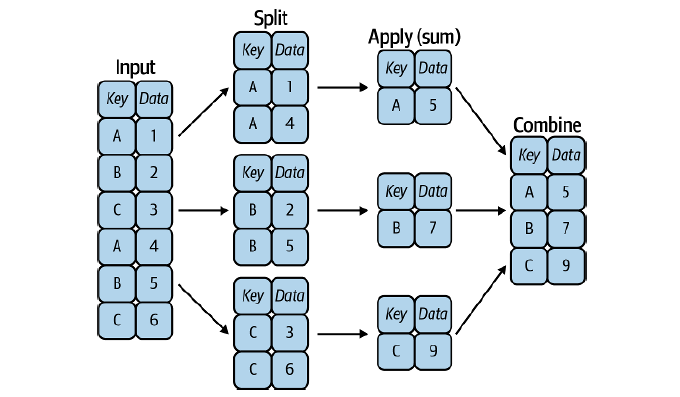

While this could be done manually using some combinatino of the masking, aggregationm and merging commands covered, an important realization is that `the intermediate splits do not need to be explicitly instantiated`.

Rather, the `groupby` can (often) do this in a single pass over the data, updating the sum, mean, count, min, or other aggregate for each group allong the way. The power of the `groupby` is that it abstracts away these steps: the user need not think about *how* the computation is done under the hood, but rather can think about the *operation as a whole*.

As a concrete example, let's take a look at using Pandas for the computation shown in the following table. Start by creating the input `DataFrame`.

In [219]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


The most basic split-apply-combine operation can be computed with the `groupby` method of the `DataFrame`, passing the name of the desired key column.

In [220]:
df.groupby('key')

Notice that what is returned is a `DataFrameGroupBy` object, not a set of `DataFrame` objects. This object is where the magic is: you can think of it as a special view of the `DataFrame`, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented efficiently in a way that is almost transparent to the user.

To produce a seult, we can apply an aggregate to this `DataFrameGroupBy` object, which will perform the appropriate apply/combine steps to produce the desired result.

In [221]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


The `sum` method is just one possibility here; you can apply most Pandas or NumPy aggregation functions, as well as most `DataFrame` operations.

### The `GroupBy` Object

The `GroupBy` object is a flexible abstraction: in many ways it can be treated as simply a collection of `DataFrames`, though it is doing more sophisticated things under the hood. Perhaps the most important operations made available by a `GroupBy` are *aggregate*, *filter*, *transform*, and *apply*. We'll discuss each of these fully in the next section, but for now let's look at some of the other functionality that can be used with the basic `GroupBy` operation.

#### Column indexing

The `GroupBy` object supports column indexing in the same way as the `DataFrame`, and returns a modified `GroupBy` object.

In [222]:
planets.groupby('method')

In [223]:
planets.groupby('method')['orbital_period']

Here, we've selected a particular `Series` group from the original `DataFrame` group by reference to its column name. As with the `GroupBy` object, no computation is done until we call some aggregate on the object.

In [224]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups

The `GroupBy` object supports direct iteration over the groups, returning each group as a `Series` or `DataFrame`.

In [225]:
for (method, group) in planets.groupby('method'):
    print('{0:30s} shape={1}'.format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


#### Dispatch methods

Any method not explicitly implemented by the `GroupBy` object will be passed through and called on the groups, whether they are `DataFrame` or `Series` objects. For example, using the `describe` method is equivalent to calling `describe` on the `DataFrame` representing each group.

In [226]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

This table shows that the vast majority of planets until 2014 were discovered by the Radial Velocity and Transit methods, though the latter method became more common recently. The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

Notice that these dispatch methods are applied *to each individual group*, and the results are then combined within `GroupBy` and returned. Any valid `DataFrame` or `Series` method can e called in a similar manner on the corresponding `GroupBy` object.

### Aggregate, Filter, Transform, Apply

The preceding discussion focused on aggregation for the combine operation, but there are more options available. In particular, `GroupBy` objects have `aggregate`, `filter`, `transform`, and `apply` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this `DataFrame`.

In [228]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation


The method `aggregate` allows for even more flexibility than `GroupBy` aggregations. It can take a string, a function, or a list thereof, and compute all the aggregates at once.

In [230]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another common pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [231]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value.

In [232]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes teh filter. Here, because group A does not have a standard deviation greater than 4, it gets dropped.

#### Transformation

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean.

In [233]:
def center(x):
    return x - x.mean()

df.groupby('key').transform(center)

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The `apply` method

The `apply` method lets you apply an arbitrary function to the group results. The function should take a `DataFrame` and returns a Pandas object (e.g., `DataFrame`, `Series`) or a scalar; the behavior of the combine step will be tailored to the type of output returned.

For example, here is an `apply` operation that normalizes the first column by the sum of the second.

In [241]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2, include_groups=False)

data1  data2
key                   
A   0  0.000000      5
    3  0.375000      3
B   1  0.142857      0
    4  0.571429      7
C   2  0.166667      3
    5  0.416667      9

`apply` within a `GroupBy` is flexible: the only criterion is that the function takes a `DataFrame` and returns a Pandas object or scalar.

### Specifying the Split Key

#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the `DataFrame`.

In [242]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


This means, there's another, more verbose way of accomplishing the `df.groupby('key')` from before.

In [243]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


#### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys.

In [245]:
df2 = df.set_index('key')
mapping = {'A' : 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


#### Any Python function

Similar to mapping, you can pass any Python function that will input the index value and ouput the group.

In [252]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


#### A list of valid keys

Any of the preceding key choices can be combined to group on a multi-index.

In [251]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


## 20.3 Grouping Example
---

As an example of this, in a few lines of code, we can put all these together and count discovered planets by method and by decade.

In [253]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Chapter 21 : Pivot Tables